<a href="https://colab.research.google.com/github/LuisJavierFI/ModelosDeClasificacion/blob/main/ModelosClasificaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Clúster Jerárquico vs Clúster Particional**
# **Luis Javier**
## ljfi16xc@gmail.com


### **Caso de estudio**

Estudios clínicos de diabetes en una población femenina.

**Objetivo.** Clasificar si una persona tiene diabetes o no, en función de otros parámetros disponibles, como número de embarazos, glucosa, presión arterial, índice de masa corporal, los niveles de insulina, entre otros. Se requiere obtener el mejor modelo de aprendizaje automático para predecir la diabetes.

**Emplear los algoritmos:** 

* Regresión logística.
* Árbol de decisión.
* Bosque aleatorio.
* Máquinas de soporte vectorial.

**Variables:**

* Número de embarazos (Pregnancies): número de veces que ha estado embarazada la persona.

* Concentración de glucosa en plasma (Glucose): cantidad de glucosa en la sangre. Cuando una persona ha ingerido alimento los valores normales son menores a 140 mg/DL y cuando los resultados se dan entre 140 a 190 son indicativos de diabetes.

* Presión arterial diastólica (BloodPressure): es la cantidad de presión que hay en las arterias ente un latido y otro.

* Espesor del pliegue cutáneo (SkinThickness): es un procedimiento frecuentemente utilizado, en combinación con el índice de masa corporal (IMC), para estimar la grasa corporal. Medir los pliegues cutáneos permite valorar los depósitos de grasa del cuerpo humano. A modo de referencia, según la medicina el espesor normal: ♂ 12 mm; ♀ 23 mm.

* Insulina (Insulin): es una prueba de insulina que consiste analizar antes de administrar la glucosa y 2 horas después. La razón por la que se realizan estas pruebas es para ver la curva de respuesta a la glucosa.

* Índice de masa corporal (BMI): es utilizado para estimar la cantidad de grasa corporal, y determinar si el peso está dentro del rango normal, o por el contrario, se tiene sobrepeso o delgadez.

* Función pedigrí de la diabetes (DiabetesPedigreeFunction): es una función que califica la probabilidad de diabetes según los antecedentes familiares.

* Edad en años (Age).

* Resultado (Outcome): si es positivo o negativo al diagnóstico de diabetes.

### **I. Acceso a datos y selección de características**

#### **1) Acceso a los datos**

In [ ]:
import pandas as pd               # Para la manipulación y análisis de datos
import numpy as np                # Para crear vectores y matrices n dimensionales
import matplotlib.pyplot as plt   # Para la generación de gráficas a partir de los datos
import seaborn as sns             # Para la visualización de datos basado en matplotlib
%matplotlib inline

In [ ]:
from google.colab import files
files.upload()

Saving diabetes.csv to diabetes.csv


{'diabetes.csv': b'Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome\r\n6,148,72,35,0,33.6,0.627,50,1\r\n1,85,66,29,0,26.6,0.351,31,0\r\n8,183,64,0,0,23.3,0.672,32,1\r\n1,89,66,23,94,28.1,0.167,21,0\r\n0,137,40,35,168,43.1,2.288,33,1\r\n5,116,74,0,0,25.6,0.201,30,0\r\n3,78,50,32,88,31,0.248,26,1\r\n10,115,0,0,0,35.3,0.134,29,0\r\n2,197,70,45,543,30.5,0.158,53,1\r\n8,125,96,0,0,0,0.232,54,1\r\n4,110,92,0,0,37.6,0.191,30,0\r\n10,168,74,0,0,38,0.537,34,1\r\n10,139,80,0,0,27.1,1.441,57,0\r\n1,189,60,23,846,30.1,0.398,59,1\r\n5,166,72,19,175,25.8,0.587,51,1\r\n7,100,0,0,0,30,0.484,32,1\r\n0,118,84,47,230,45.8,0.551,31,1\r\n7,107,74,0,0,29.6,0.254,31,1\r\n1,103,30,38,83,43.3,0.183,33,0\r\n1,115,70,30,96,34.6,0.529,32,1\r\n3,126,88,41,235,39.3,0.704,27,0\r\n8,99,84,0,0,35.4,0.388,50,0\r\n7,196,90,0,0,39.8,0.451,41,1\r\n9,119,80,35,0,29,0.263,29,1\r\n11,143,94,33,146,36.6,0.254,51,1\r\n10,125,70,26,115,31.1,0.205,41,1\r\n7,147,76,0,0,39.4,0.257,43

In [ ]:
Diabetes = pd.read_csv('diabetes.csv')
Diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
Diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
print(Diabetes.groupby('Outcome').size())

Outcome
0    500
1    268
dtype: int64


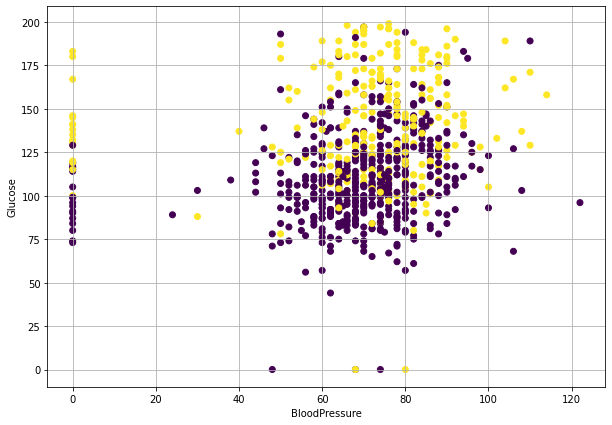

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(Diabetes['BloodPressure'], Diabetes['Glucose'], c = Diabetes.Outcome)
plt.grid()
plt.xlabel('BloodPressure')
plt.ylabel('Glucose')
plt.show()

In [ ]:
Diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### **2) Selección de características**

A través de un mapa de calor de identifican posibles variables correlacionadas.

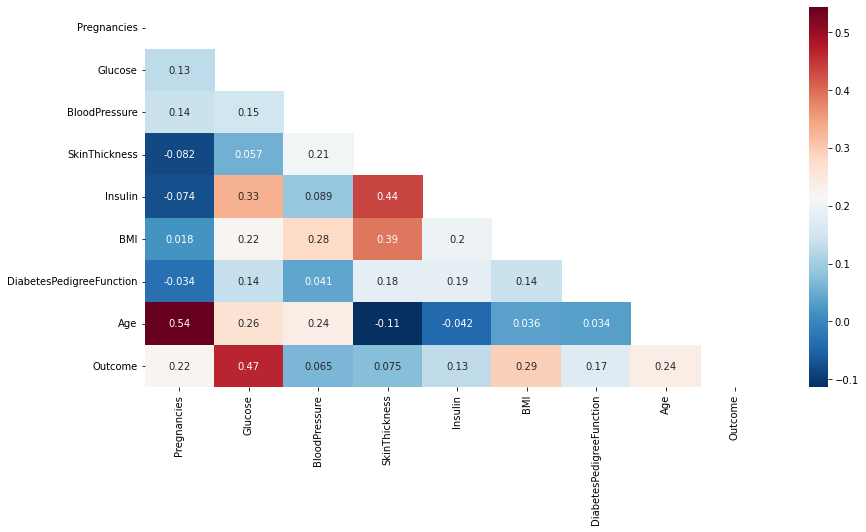

In [ ]:
plt.figure(figsize=(14,7))
MatrizCor = np.triu(Diabetes.corr())
sns.heatmap(Diabetes.corr(), cmap='RdBu_r', annot=True, mask=MatrizCor)
plt.show()

**Varibles seleccionadas:**

0) Pregnancies

1) Glucose

2) BloodPressure

3) SkinThickness

4) Insulin

5) BMI (Índice de Masa Coorporal)

6) Diabetes Pedigree Function

7) Age

8) OutCome

#### **3) Definición de las variables predictoras y variable clase**

In [ ]:
#Variables predictoras
X = np.array(Diabetes[['Pregnancies', 
                      'Glucose', 
                      'BloodPressure', 
                      'SkinThickness', 
                      'Insulin', 
                      'BMI',
                      'DiabetesPedigreeFunction',
                      'Age']])
pd.DataFrame(X)

,0,1,2,3,4,5,6,7
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0


In [ ]:
#Variable clase
Y = np.array(Diabetes[['Outcome']])
pd.DataFrame(Y)

,0
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


### **II. Creación de los modelos**

In [ ]:
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, 
                                                                                test_size = 0.2,
                                                                                random_state = 1234,
                                                                                shuffle = True)

In [ ]:
pd.DataFrame(Y_train)

,0
0,0
1,1
2,1
3,0
4,0
...,...
609,0
610,0
611,1
612,0


#### **Modelo 1: Regresión Logística**

In [ ]:
from sklearn import linear_model

In [ ]:
Entrenar_RL = linear_model.LogisticRegression()
Entrenar_RL.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
# Predicciones probabilidades de los datos de prueba
Probabilidad_RL = Entrenar_RL.predict_proba(X_validation)
pd.DataFrame(Probabilidad_RL)

,0,1
0,0.770362,0.229638
1,0.304950,0.695050
2,0.593110,0.406890
3,0.513169,0.486831
4,0.761308,0.238692
...,...,...
149,0.932176,0.067824
150,0.130410,0.869590
151,0.692481,0.307519
152,0.806877,0.193123


In [ ]:
# Predicciones con clasificación final
Predecir_RL = Entrenar_RL.predict(X_validation)
pd.DataFrame(Predecir_RL)

,0
0,0
1,1
2,0
3,0
4,0
...,...
149,0
150,1
151,0
152,0


In [ ]:
Entrenar_RL.score(X_validation, Y_validation)

0.7727272727272727

#### **Validación: Regresión Logística**

In [ ]:
# Reporte de la clasificación
print("Exactitus", Entrenar_RL.score(X_validation, Y_validation))
print(classification_report(Y_validation, Predecir_RL))

Exactitus 0.7727272727272727
              precision    recall  f1-score   support

           0       0.78      0.91      0.84        99
           1       0.76      0.53      0.62        55

    accuracy                           0.77       154
   macro avg       0.77      0.72      0.73       154
weighted avg       0.77      0.77      0.76       154



#### **Modelo 2: Árboles de decisión**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import model_selection

In [ ]:
#Se entrena el modelo a partir de los datos de entrada
Entrenar_AD = DecisionTreeClassifier(max_depth=8, min_samples_split=4, min_samples_leaf=2)
Entrenar_AD.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=2, min_samples_split=4)

In [ ]:
#Se etiquetan las clasificaciones
Predecir_AD = Entrenar_AD.predict(X_validation)
pd.DataFrame(Predecir_AD)

,0
0,1
1,1
2,1
3,1
4,1
...,...
149,0
150,1
151,1
152,0


In [ ]:
# Comparar valores
Valores_AD = pd.DataFrame(Y_validation, Predecir_AD)
Valores_AD

,0
1,0
1,0
1,1
1,1
1,0
...,...
0,0
1,1
1,0
0,1


In [ ]:
#Se calcula la exactitud promedio de la validación
Entrenar_AD.score(X_validation, Y_validation)

0.6623376623376623

#### **Validación: árboles de Desición**

In [ ]:
#Reporte de la clasificación
print('Criterio: \n', Entrenar_AD.criterion)
print('Importancia variables: \n', Entrenar_AD.feature_importances_)
print("Exactitud", Entrenar_AD.score(X_validation, Y_validation))
print(classification_report(Y_validation, Predecir_AD))

Criterio: 
 gini
Importancia variables: 
 [0.0327163  0.39684589 0.06220557 0.07400307 0.04616461 0.17447107
 0.12046587 0.09312761]
Exactitud 0.6623376623376623
              precision    recall  f1-score   support

           0       0.73      0.75      0.74        99
           1       0.53      0.51      0.52        55

    accuracy                           0.66       154
   macro avg       0.63      0.63      0.63       154
weighted avg       0.66      0.66      0.66       154



#### **Modelo 3: Bosques aleatorios**


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import model_selection

In [ ]:
Entrenar_BA = RandomForestClassifier(n_estimators=100, max_depth=8, min_samples_split=4, min_samples_leaf=2, random_state=0)
Entrenar_BA.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(max_depth=8, min_samples_leaf=2, min_samples_split=4,
                       random_state=0)

In [ ]:
#Se etiquetan las clasificaciones
Predecir_BA = Entrenar_BA.predict(X_validation)
pd.DataFrame(Predecir_BA)

,0
0,0
1,1
2,0
3,0
4,0
...,...
149,0
150,1
151,0
152,0


In [ ]:
Valores = pd.DataFrame(Y_validation, Predecir_BA)
Valores

,0
0,0
1,0
0,1
0,1
0,0
...,...
0,0
1,1
0,0
0,1


In [ ]:
Entrenar_BA.score(X_validation, Y_validation)

0.7532467532467533

#### **Validación: Bosques Aleatorios**

In [ ]:
#Reporte de la clasificación
print('Criterio: \n', Entrenar_BA.criterion)
print('Importancia variables: \n', Entrenar_BA.feature_importances_)
print("Exactitud", Entrenar_BA.score(X_validation, Y_validation))
print(classification_report(Y_validation, Predecir_BA))

Criterio: 
 gini
Importancia variables: 
 [0.07152222 0.28835979 0.07502993 0.06660087 0.06808289 0.17091034
 0.11067903 0.14881493]
Exactitud 0.7532467532467533
              precision    recall  f1-score   support

           0       0.77      0.89      0.82        99
           1       0.72      0.51      0.60        55

    accuracy                           0.75       154
   macro avg       0.74      0.70      0.71       154
weighted avg       0.75      0.75      0.74       154



#### **Modelo 4: Máquinas de soporte vectorial**

In [ ]:
from sklearn.svm import SVC

degreeSet = 3

###### **SMV Lineal**

In [ ]:
#Se declara el tipo de kernel y se entrena el modelo
ModeloSVM_1 = SVC(kernel='linear', degree = degreeSet)
ModeloSVM_1.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [ ]:
Clasificaciones_1 = ModeloSVM_1.predict(X_validation)
print(Clasificaciones_1)

[0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 1 0 0 1 1 1 1 1
 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 1]


In [ ]:
#Se calcula la exactitud promedio de la validación
ModeloSVM_1.score(X_validation, Y_validation)

0.7532467532467533

###### **Validació SMV Lineal**

In [ ]:
#Reporte de la clasificación
print("Exactitud", ModeloSVM_1.score(X_validation, Y_validation))
print(classification_report(Y_validation, Clasificaciones_1))

Exactitud 0.7532467532467533
              precision    recall  f1-score   support

           0       0.77      0.89      0.82        99
           1       0.72      0.51      0.60        55

    accuracy                           0.75       154
   macro avg       0.74      0.70      0.71       154
weighted avg       0.75      0.75      0.74       154



###### **SMV Poly**

In [ ]:
#Se declara el tipo de kernel y se entrena el modelo
ModeloSVM_2 = SVC(kernel='poly', degree = degreeSet)
ModeloSVM_2.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='poly')

In [ ]:
Clasificaciones_2 = ModeloSVM_2.predict(X_validation)
print(Clasificaciones_2)

[0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 1 1 0 1 0
 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 1 0 0 1]


In [ ]:
#Se calcula la exactitud promedio de la validación
ModeloSVM_2.score(X_validation, Y_validation)

0.7467532467532467

###### **Validació SMV Poly**

In [ ]:
#Reporte de la clasificación
print("Exactitud", ModeloSVM_2.score(X_validation, Y_validation))
print(classification_report(Y_validation, Clasificaciones_2))

Exactitud 0.7467532467532467
              precision    recall  f1-score   support

           0       0.74      0.94      0.83        99
           1       0.79      0.40      0.53        55

    accuracy                           0.75       154
   macro avg       0.76      0.67      0.68       154
weighted avg       0.76      0.75      0.72       154



###### **SMV RBF**

In [ ]:
#Se declara el tipo de kernel y se entrena el modelo
ModeloSVM_3 = SVC(kernel='rbf', degree = degreeSet)
ModeloSVM_3.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [ ]:
Clasificaciones_3 = ModeloSVM_3.predict(X_validation)
print(Clasificaciones_3)

[0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 1 1 0 1 0
 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 1]


In [ ]:
#Se calcula la exactitud promedio de la validación
ModeloSVM_3.score(X_validation, Y_validation)

0.7467532467532467

###### **Validación SMV RBF**

In [ ]:
#Reporte de la clasificación
print("Exactitud", ModeloSVM_3.score(X_validation, Y_validation))
print(classification_report(Y_validation, Clasificaciones_3))

Exactitud 0.7467532467532467
              precision    recall  f1-score   support

           0       0.73      0.95      0.83        99
           1       0.81      0.38      0.52        55

    accuracy                           0.75       154
   macro avg       0.77      0.67      0.67       154
weighted avg       0.76      0.75      0.72       154



###### **SMV Sigmoide**

In [ ]:
#Se declara el tipo de kernel y se entrena el modelo
ModeloSVM_4 = SVC(kernel='sigmoid', degree = degreeSet)
ModeloSVM_4.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='sigmoid')

In [ ]:
Clasificaciones_4 = ModeloSVM_4.predict(X_validation)
print(Clasificaciones_4)

[0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1
 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0]


In [ ]:
#Se calcula la exactitud promedio de la validación
ModeloSVM_4.score(X_validation, Y_validation)

0.4675324675324675

###### **Validación SMV Sigmoide**

In [ ]:
#Reporte de la clasificación
print("Exactitud", ModeloSVM_4.score(X_validation, Y_validation))
print(classification_report(Y_validation, Clasificaciones_4))

Exactitud 0.4675324675324675
              precision    recall  f1-score   support

           0       0.57      0.70      0.63        99
           1       0.09      0.05      0.07        55

    accuracy                           0.47       154
   macro avg       0.33      0.38      0.35       154
weighted avg       0.40      0.47      0.43       154



##### **Validación: SVM (Resumen)**

In [ ]:
print("Exactitud SVM_1", ModeloSVM_1.score(X_validation, Y_validation))
print("Exactitud SVM_2", ModeloSVM_2.score(X_validation, Y_validation))
print("Exactitud SVM_3", ModeloSVM_3.score(X_validation, Y_validation))
print("Exactitud SVM_4", ModeloSVM_4.score(X_validation, Y_validation))

Exactitud SVM_1 0.7532467532467533
Exactitud SVM_2 0.7467532467532467
Exactitud SVM_3 0.7467532467532467
Exactitud SVM_4 0.4675324675324675
